In [176]:
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from keras import optimizers
from numpy.random import seed
from numpy import array
from numpy import argmax
from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

## Obtain the data
We get the data from csv file and put in a  dataframe

In [184]:
seed(10)
# read dataset
csv_file = 'assignment_ds.csv'
df = pd.read_csv(csv_file, header=None)
df = df.iloc[1: , :]
df[0:10]

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,Red,M,0
2,12098,689,7.01,0.02,Blue-white,A,3
3,2731,0.000437,0.0856,18.09,Red,M,0
4,37800,202900,6.86,-4.56,Blue,O,3
5,8570,0.00081,0.0097,14.2,Blue white,A,2
6,3605,126000,1124,-10.81,Red,M,5
7,8052,8.7,1.8,2.42,Whitish,A,3
8,3574,200000,89,-5.24,Red,M,4
9,8829,537493,1423,-10.73,White,A,5
10,3625,74000,876,-10.25,Red,M,5


## We look the classifications by colors.

In [185]:
df.groupby(4).apply(list)

4
Blue                  [0, 1, 2, 3, 4, 5, 6]
Blue White            [0, 1, 2, 3, 4, 5, 6]
Blue white            [0, 1, 2, 3, 4, 5, 6]
Blue-White            [0, 1, 2, 3, 4, 5, 6]
Blue-white            [0, 1, 2, 3, 4, 5, 6]
Orange                [0, 1, 2, 3, 4, 5, 6]
Orange-Red            [0, 1, 2, 3, 4, 5, 6]
Pale yellow orange    [0, 1, 2, 3, 4, 5, 6]
Red                   [0, 1, 2, 3, 4, 5, 6]
White                 [0, 1, 2, 3, 4, 5, 6]
White-Yellow          [0, 1, 2, 3, 4, 5, 6]
Whitish               [0, 1, 2, 3, 4, 5, 6]
Yellowish             [0, 1, 2, 3, 4, 5, 6]
Yellowish White       [0, 1, 2, 3, 4, 5, 6]
white                 [0, 1, 2, 3, 4, 5, 6]
yellow-white          [0, 1, 2, 3, 4, 5, 6]
yellowish             [0, 1, 2, 3, 4, 5, 6]
dtype: object

## We clean the data  first converting the colors to lower case

In [186]:
# column to lower case
df[4] = df[4].map(lambda x: x if type(x)!=str else x.lower())
df

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,red,M,0
2,12098,689,7.01,0.02,blue-white,A,3
3,2731,0.000437,0.0856,18.09,red,M,0
4,37800,202900,6.86,-4.56,blue,O,3
5,8570,0.00081,0.0097,14.2,blue white,A,2
...,...,...,...,...,...,...,...
196,13420,0.00059,0.00981,13.67,blue white,B,2
197,19860,0.0011,0.0131,11.34,blue,B,2
198,13023,998,6.21,-1.38,blue-white,A,3
199,39000,204000,10.6,-4.7,blue,O,3


## We replace the similar colors.

In [187]:
df[4] = df[4].replace(['blue-white'], 'blue white')
df[4] = df[4].replace(['orange-red'], 'orange red')
df[4] = df[4].replace(['yellow-white'], 'yellow white')
df[4] = df[4].replace(['white-yellow'], 'white yellow')
df

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,red,M,0
2,12098,689,7.01,0.02,blue white,A,3
3,2731,0.000437,0.0856,18.09,red,M,0
4,37800,202900,6.86,-4.56,blue,O,3
5,8570,0.00081,0.0097,14.2,blue white,A,2
...,...,...,...,...,...,...,...
196,13420,0.00059,0.00981,13.67,blue white,B,2
197,19860,0.0011,0.0131,11.34,blue,B,2
198,13023,998,6.21,-1.38,blue white,A,3
199,39000,204000,10.6,-4.7,blue,O,3


## We Normalize the data

In [188]:
# scale input data
inputs_numbers = df[[0,1,2,3]]
x = inputs_numbers.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
inputs_numbers = pd.DataFrame(x_scaled)
inputs_numbers

,0,1,2,3
0,0.039778,6.369052e-10,3.536069e-05,0.906817
1,0.266914,8.111416e-04,3.593344e-03,0.373358
2,0.020809,4.202868e-10,3.962039e-05,0.938399
3,0.942198,2.388689e-01,3.516361e-03,0.230144
4,0.174220,8.594100e-10,6.671828e-07,0.816760
...,...,...,...,...
195,0.301647,6.004097e-10,7.236367e-07,0.800188
196,0.470849,1.200819e-09,2.412122e-06,0.727330
197,0.291217,1.174919e-03,3.182770e-03,0.329581
198,0.973726,2.401639e-01,5.435795e-03,0.225766


## We make the one hot encoding to the colors and the type of the spectrum

In [189]:
one_hot_colors = pd.get_dummies(df[[4]]).reset_index(drop=True)
one_hot_spectrum = pd.get_dummies(df[[5]]).reset_index(drop=True)
one_hot_colors

,4_blue,4_blue white,4_orange,4_orange red,4_pale yellow orange,4_red,4_white,4_white yellow,4_whitish,4_yellow white,4_yellowish,4_yellowish white
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,0,0,0,0,0,0,0,0,0
196,1,0,0,0,0,0,0,0,0,0,0,0
197,0,1,0,0,0,0,0,0,0,0,0,0
198,1,0,0,0,0,0,0,0,0,0,0,0


## Transform target to one hot encode

In [190]:
#one_hot_target = pd.get_dummies(df[[6]]).reset_index(drop=True)

target=df[[6]]
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)


target = target.rename(columns = {
   0: 23,
   1: 24,
   2: 25,
   3: 26,
   4: 27,
   5: 28,
    
}, inplace = False)
target

C:\Users\Dani Camacho\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195,0.0,0.0,1.0,0.0,0.0,0.0
196,0.0,0.0,1.0,0.0,0.0,0.0
197,0.0,0.0,0.0,1.0,0.0,0.0
198,0.0,0.0,0.0,1.0,0.0,0.0


## We move the target column to the last and join the rest

In [191]:



#new_df= pd.concat([inputs_numbers, one_hot_colors, one_hot_spectrum, one_hot_target], axis=1,)
new_df= pd.concat([inputs_numbers, one_hot_colors, one_hot_spectrum, target], axis=1,)
new_df

,0,1,2,3,4_blue,4_blue white,4_orange,4_orange red,4_pale yellow orange,4_red,...,5_G,5_K,5_M,5_O,23,24,25,26,27,28
0,0.039778,6.369052e-10,3.536069e-05,0.906817,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.266914,8.111416e-04,3.593344e-03,0.373358,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.020809,4.202868e-10,3.962039e-05,0.938399,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.942198,2.388689e-01,3.516361e-03,0.230144,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174220,8.594100e-10,6.671828e-07,0.816760,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.301647,6.004097e-10,7.236367e-07,0.800188,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
196,0.470849,1.200819e-09,2.412122e-06,0.727330,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
197,0.291217,1.174919e-03,3.182770e-03,0.329581,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
198,0.973726,2.401639e-01,5.435795e-03,0.225766,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0


## We rename the columns with his index

In [192]:
new_df = new_df.rename(columns = {
    '4_blue': 4,
    '4_blue white':5,
    '4_orange':6,
    '4_orange red': 7,
    '4_pale yellow orange': 8,
    '4_red': 9,
    '4_white': 10,
    '4_white yellow': 11,
    '4_whitish': 12,
    '4_yellow white': 13,
    '4_yellowish':14,
    '4_yellowish white': 15,
    '5_A': 16,
    '5_B': 17,
    '5_F': 18,
    '5_G': 19,
    '5_K': 20,
    '5_M': 21,
    '5_O': 22,
   # '6_0': 23,
   # '6_1': 24,
   # '6_2': 25,
   # '6_3': 26,
   # '6_4': 27,
   # '6_5': 28,
    
}, inplace = False)
df=new_df
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.039778,6.369052e-10,3.536069e-05,0.906817,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.266914,8.111416e-04,3.593344e-03,0.373358,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.020809,4.202868e-10,3.962039e-05,0.938399,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.942198,2.388689e-01,3.516361e-03,0.230144,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174220,8.594100e-10,6.671828e-07,0.816760,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.301647,6.004097e-10,7.236367e-07,0.800188,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
196,0.470849,1.200819e-09,2.412122e-06,0.727330,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
197,0.291217,1.174919e-03,3.182770e-03,0.329581,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
198,0.973726,2.401639e-01,5.435795e-03,0.225766,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0


## We divide the data set in inputs and the target

In [193]:
# shuffle dataset
df = df.sample(frac=1)

# get inputs - outputs
inputs = df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
target = df [[23,24,25,26,27,28]]


## We separate the data set with 80 - 20 definition

In [194]:
# define training dataset size
ds_size = inputs.shape[0]
train_size_percentage = .7
test_size_percentage = .2

training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)

# get training data
input_training = inputs[:training_size]
target_training = target[:training_size]

# get test data
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]

# get validation data
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]

# used during training
print('Training DS size:', input_training.shape[0])
print('Test DS size:', input_test.shape[0])

# used during validation
print('Validation DS size', input_validation.shape[0])

Training DS size: 140
Test DS size: 40
Validation DS size 20


## We define the configurations of the training

In [195]:
# neural network
model = models.Sequential()

# input layer
model.add(layers.Dense(64, activation='relu', input_shape=(23,)))

# hidden layers
model.add(layers.Dense(32, activation='relu'))

# output layers
model.add(layers.Dense(6))

#rmsprop = optimizers.Adam(learning_rate=0.01)
rmsprop = optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])





## We traing the neural networks

In [196]:
num_epochs = 180
batch_size = 64

history = model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/180
3/3 [==============================] - 0s 36ms/step - loss: 0.1903 - categorical_accuracy: 0.2643 - val_loss: 0.1283 - val_categorical_accuracy: 0.3000
Epoch 2/180
3/3 [==============================] - 0s 6ms/step - loss: 0.1084 - categorical_accuracy: 0.5643 - val_loss: 0.0824 - val_categorical_accuracy: 0.6500
Epoch 3/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0755 - categorical_accuracy: 0.7000 - val_loss: 0.0652 - val_categorical_accuracy: 0.8000
Epoch 4/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0683 - categorical_accuracy: 0.6786 - val_loss: 0.0566 - val_categorical_accuracy: 0.8000
Epoch 5/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0552 - categorical_accuracy: 0.7286 - val_loss: 0.0455 - val_categorical_accuracy: 0.8000
Epoch 6/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0482 - categorical_accuracy: 0.8143 - val_loss: 0.0474 - val_categorical_accuracy: 0.8250
Epoch 7/180
3/3 [====

3/3 [==============================] - 0s 6ms/step - loss: 0.0211 - categorical_accuracy: 0.9286 - val_loss: 0.0182 - val_categorical_accuracy: 0.9500
Epoch 52/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0152 - categorical_accuracy: 0.9929 - val_loss: 0.0218 - val_categorical_accuracy: 0.9000
Epoch 53/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0155 - categorical_accuracy: 0.9786 - val_loss: 0.0192 - val_categorical_accuracy: 0.9250
Epoch 54/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0191 - categorical_accuracy: 0.9714 - val_loss: 0.0227 - val_categorical_accuracy: 0.9750
Epoch 55/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0246 - categorical_accuracy: 0.9143 - val_loss: 0.0325 - val_categorical_accuracy: 0.9000
Epoch 56/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0221 - categorical_accuracy: 0.9643 - val_loss: 0.0295 - val_categorical_accuracy: 0.8750
Epoch 57/180
3/3 [===========

3/3 [==============================] - 0s 6ms/step - loss: 0.0094 - categorical_accuracy: 0.9786 - val_loss: 0.0153 - val_categorical_accuracy: 0.9250
Epoch 102/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0251 - categorical_accuracy: 0.8714 - val_loss: 0.0498 - val_categorical_accuracy: 0.8000
Epoch 103/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0256 - categorical_accuracy: 0.9286 - val_loss: 0.0194 - val_categorical_accuracy: 0.9500
Epoch 104/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0156 - categorical_accuracy: 0.9429 - val_loss: 0.0133 - val_categorical_accuracy: 0.9500
Epoch 105/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0101 - categorical_accuracy: 0.9643 - val_loss: 0.0159 - val_categorical_accuracy: 0.9250
Epoch 106/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.0132 - val_categorical_accuracy: 0.9500
Epoch 107/180
3/3 [=====

Epoch 151/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0077 - categorical_accuracy: 0.9786 - val_loss: 0.0107 - val_categorical_accuracy: 0.9750
Epoch 152/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0158 - val_categorical_accuracy: 0.9250
Epoch 153/180
3/3 [==============================] - 0s 7ms/step - loss: 0.0088 - categorical_accuracy: 0.9786 - val_loss: 0.0134 - val_categorical_accuracy: 1.0000
Epoch 154/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0192 - categorical_accuracy: 0.9143 - val_loss: 0.0165 - val_categorical_accuracy: 0.9250
Epoch 155/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0101 - val_categorical_accuracy: 0.9750
Epoch 156/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0046 - categorical_accuracy: 1.0000 - val_loss: 0.0215 - val_categorical_accuracy: 0.9000
Epoch 157/

In [197]:
epochs = range(1, num_epochs+1)

# during training
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']

# outside training
val_loss = history.history['val_loss']
val_accuracy = history.history['val_categorical_accuracy']


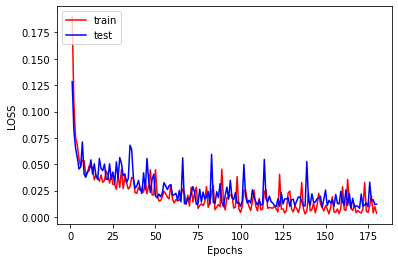

In [198]:
# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

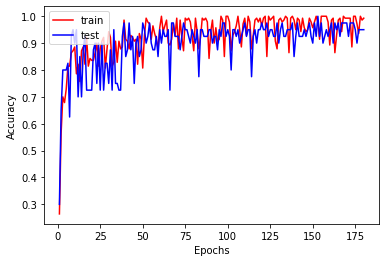

In [199]:
# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [200]:
#predict
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

In [201]:
# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

In [202]:
# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,3
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4
